# Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Read Dataset

In [2]:
df = pd.read_csv("parkinsons.data")

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.shape

(195, 24)

<div style="border-radius:10px; padding: 15px; background-color: lightblue; font-size:120%; text-align:left">

<h2 align="left"><font color=red>Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __name__ | ASCII subject name and recording number |
| __MDVP:Fo(Hz)__ | Average vocal fundamental frequency |
| __MDVP:Fhi(Hz)__ |Maximum vocal fundamental frequency |
| __MDVP:Flo(Hz)__ | Minimum vocal fundamental frequency |
| __MDVP:Jitter(%)__ |  measures the percentage variation in fundamental frequency|                     
| __MDVP:Jitter(Abs)__ | the absolute value of jitter |
| __MDVP:RAP__ |  |  
| __MDVP:PPQ__ |  |                      
| __Jitter:DDP__ | Several measures of variation in fundamental frequency |
| __MDVP:Shimmer__ |  |
| __MDVP:Shimmer(dB)__ | |                      
| __Shimmer:APQ3__ | |              
| __Shimmer:APQ5__ |  |
| __MDVP:APQ__ |  |
| __himmer:DDA__ |Several measures of variation in amplitude |
| __NHR__ |  |
| __HNR__ |Two measures of ratio of noise to tonal components in the voice|
| __status__ | Health status of the subject (one) - Parkinson's, (zero) - healthy|
| __RPDE*, D2 -*</strong>__ |Two nonlinear dynamical complexity |
| __DFA -*__ | Signal fractal scaling exponent|
| __spread1,spread2,PPE__ |Three nonlinear measures of fundamental frequency variation|

In [5]:
df = df.copy()

## Handle cols names
- convert all cols names to lower cases
- replace spaces in cols names with '_'
- replace ':' with '_'
- replace '(' with '_'
- replace ')' with ''
- replace '%' with 'in_percent'


In [6]:
df.columns = [c.lower()
              .replace(' ', '_')
              .replace(':', '_')
              .replace('(', '_')
              .replace(')', '')
              .replace('%', 'in_percent') for c in df.columns]

In [7]:
df.head()

,name,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,...,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Dataset Overview

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    195 non-null    object 
 1   mdvp_fo_hz              195 non-null    float64
 2   mdvp_fhi_hz             195 non-null    float64
 3   mdvp_flo_hz             195 non-null    float64
 4   mdvp_jitter_in_percent  195 non-null    float64
 5   mdvp_jitter_abs         195 non-null    float64
 6   mdvp_rap                195 non-null    float64
 7   mdvp_ppq                195 non-null    float64
 8   jitter_ddp              195 non-null    float64
 9   mdvp_shimmer            195 non-null    float64
 10  mdvp_shimmer_db         195 non-null    float64
 11  shimmer_apq3            195 non-null    float64
 12  shimmer_apq5            195 non-null    float64
 13  mdvp_apq                195 non-null    float64
 14  shimmer_dda             195 non-null    fl

In [9]:
df.describe()

,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,...,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


 <div style="border-radius:10px; padding: 15px; background-color: lightblue; font-size:120%; text-align:left">
​
<h3 align="left"><font color=red>Note:</font></h3>
    
​
* __mdvp_fo_hz __: This feature represents the fundamental frequency of the voice in hertz. The data seems to have a wide range, with a relatively low standard deviation. The values are distributed around the mean, and there are no apparent outliers.

* __mdvp_fhi_hz__: This feature indicates the highest frequency of the voice. The data shows a broader spread, with a higher standard deviation compared to the previous feature. This could suggest more variability in this aspect of voice recordings.

* __mdvp_flo(hz)__: This feature corresponds to the lowest frequency of the voice. Similar to the previous feature, the data displays a notable range, and the standard deviation is also relatively high.

* __mdvp_Jitter(%)__: This feature measures the percentage variation in fundamental frequency. The low mean and relatively low standard deviation suggest that jitter values tend to be relatively consistent, although there could be some instances of higher variation.

* __mdvp_Jitter(abs)__: This is the absolute value of jitter. The low mean and standard deviation imply generally consistent values, but there could be outliers affecting the distribution.

* __mdvp_rap and mdvp_ppq__: These features are related to different aspects of jitter. They exhibit similar characteristics to the previous jitter measures, with relatively low means and standard deviations.

* __Jitter:DDP__: This is another jitter-related feature. It correlates with the previous jitter measures, showing similar characteristics in terms of mean and standard deviation.

* __mdvp_Shimmer and mdvp_Shimmer(dB)__: These features represent measures of voice shimmer, which relates to irregularities in amplitude. Both features show moderate means and standard deviations, indicating variability in shimmer values.

* __Shimmer_dda__: This is another measure of shimmer. The data distribution seems consistent with the other shimmer-related features, with a moderate spread.

* __nhr__: NHR stands for the ratio of noise to tonal components in the voice. The relatively low mean and standard deviation suggest that the noise-to-tonal balance tends to be consistent across recordings.

* __hnr__: This feature represents the harmonic-to-noise ratio. The higher mean and lower standard deviation indicate relatively consistent harmonic-to-noise ratios in the dataset.

* __status__: This feature likely represents the health status of individuals (1 for Parkinson's, 0 for healthy). The mean indicates that a significant portion of the dataset might have Parkinson's disease.

* __rpde and dfa__: These features seem to be numerical measures with moderate variability, as indicated by their standard deviations.

* __spread1 and spread2__: Both features show moderate variability, with spread2 having a higher mean compared to spread1.

* __d2__: This feature represents a dimensionality reduction measure. The data appears to have moderate variability.

* __ppe__: This feature is related to a nonlinear dynamical complexity measure. The data displays moderate variability.

# Data Preprocessing

In [10]:
# missing values
df.isna().sum()

name                      0
mdvp_fo_hz                0
mdvp_fhi_hz               0
mdvp_flo_hz               0
mdvp_jitter_in_percent    0
mdvp_jitter_abs           0
mdvp_rap                  0
mdvp_ppq                  0
jitter_ddp                0
mdvp_shimmer              0
mdvp_shimmer_db           0
shimmer_apq3              0
shimmer_apq5              0
mdvp_apq                  0
shimmer_dda               0
nhr                       0
hnr                       0
status                    0
rpde                      0
dfa                       0
spread1                   0
spread2                   0
d2                        0
ppe                       0
dtype: int64

In [11]:
# find duplicates
df.duplicated().sum()

0

# Visualization

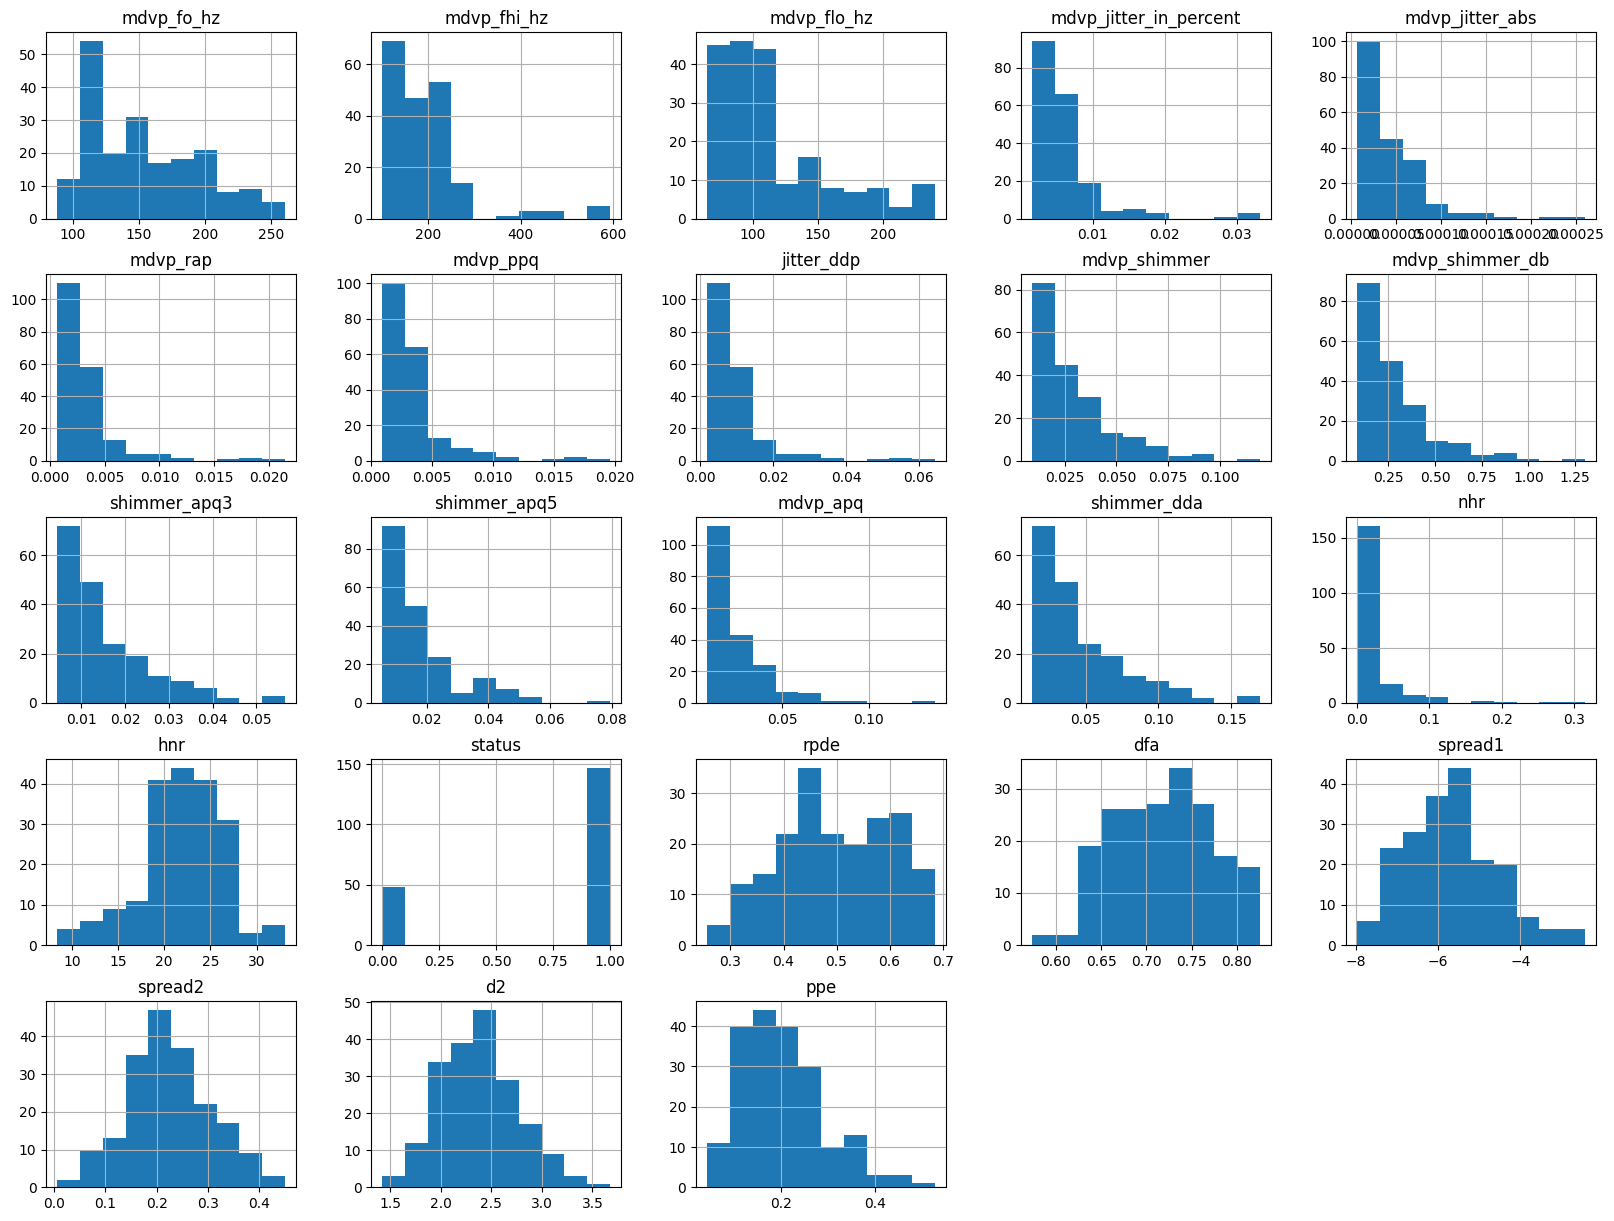

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
df.hist(figsize=(20, 15))
plt.show()

# Modeling

In [16]:
X = df.drop(['name', 'status'], axis=1)
y = df['status']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_classifier = MultinomialNB()
svm_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
lr_classifier = LogisticRegression()
KNN = KNeighborsClassifier(n_jobs=5)

my_models = [nb_classifier, svm_classifier, dt_classifier, lr_classifier, KNN]

In [30]:
for m in (my_models):
  m.fit(X_train_scaled, y_train)

In [31]:
for m in (my_models):
  y_pred = m.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{m} Accuracy on test set: {accuracy * 100:.2f}")

MultinomialNB() Accuracy on test set: 89.74
SVC() Accuracy on test set: 89.74
DecisionTreeClassifier() Accuracy on test set: 92.31
LogisticRegression() Accuracy on test set: 89.74
KNeighborsClassifier(n_jobs=5) Accuracy on test set: 94.87


In [45]:
df.iloc[0].drop("status")

name                      phon_R01_S01_1
mdvp_fo_hz                       119.992
mdvp_fhi_hz                      157.302
mdvp_flo_hz                       74.997
mdvp_jitter_in_percent           0.00784
mdvp_jitter_abs                  0.00007
mdvp_rap                          0.0037
mdvp_ppq                         0.00554
jitter_ddp                       0.01109
mdvp_shimmer                     0.04374
mdvp_shimmer_db                    0.426
shimmer_apq3                     0.02182
shimmer_apq5                      0.0313
mdvp_apq                         0.02971
shimmer_dda                      0.06545
nhr                              0.02211
hnr                               21.033
rpde                            0.414783
dfa                             0.815285
spread1                        -4.813031
spread2                         0.266482
d2                              2.301442
ppe                             0.284654
Name: 0, dtype: object

In [61]:
new_pred_x = np.array(df.iloc[0].drop("status").values[1:]).reshape(1,-1)
new_pred_y = df.iloc[0]['status']

In [62]:
new_pred_x, new_pred_y

(array([[119.992, 157.302, 74.997, 0.00784, 7e-05, 0.0037, 0.00554,
         0.01109, 0.04374, 0.426, 0.02182, 0.0313, 0.02971, 0.06545,
         0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482,
         2.301442, 0.284654]], dtype=object),
 1)

In [63]:
X_train.shape, new_pred_x.shape

((156, 22), (1, 22))

In [64]:
new_pred_x_scaled = scaler.transform(new_pred_x)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [66]:
KNN.predict(new_pred_x_scaled) == new_pred_y

array([ True])